In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Categorização

## Label encoding 

Usar quando existe uma ordem(Junior, Pleno, Sênior) ou quando existe uma grande variedade de dados

Ele vai substituir as strings por numeros sequencias(1, 2, 3, 4, 5, 6, ...)

## One-hot encoding

Usar quando não há uma ordem e não há muita variação de dados

Ele vai criar uma coluna para cada uma das variações de dados

In [75]:
census = pd.read_csv('census.csv')
census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

<AxesSubplot:xlabel='income', ylabel='count'>

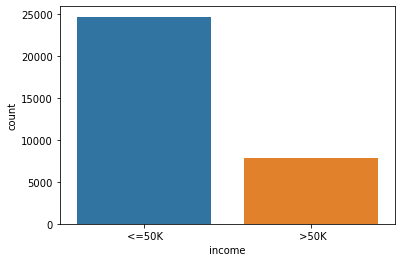

In [76]:
sns.countplot(x = census['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

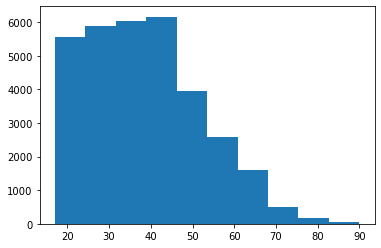

In [77]:
plt.hist(x= census['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

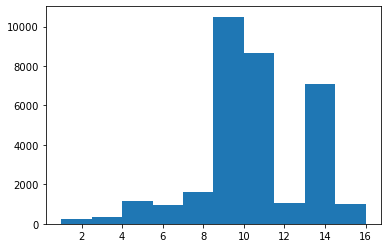

In [78]:
plt.hist(x= census['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

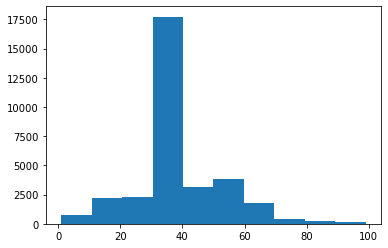

In [79]:
plt.hist(x= census['hour-per-week'])

In [80]:
grafico = px.treemap(census, path=['workclass','age'])
grafico.show()

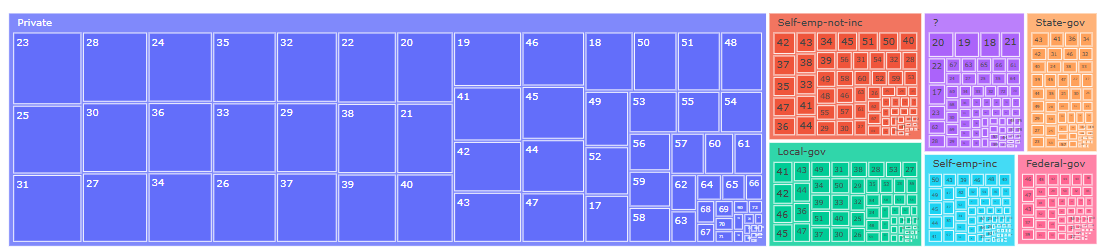

In [81]:
grafico = px.treemap(census, path=['occupation','relationship','age'])
grafico.show()

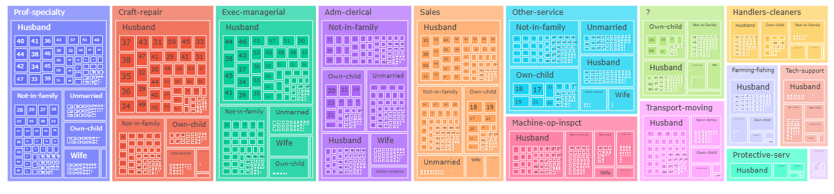

In [82]:
grafico = px.parallel_categories(census, dimensions=['occupation', 'relationship'])
grafico.show()

In [83]:
grafico = px.parallel_categories(census, dimensions=['occupation', 'relationship'])
grafico.show()

In [84]:
x_census = census.iloc[:,0:14].values
y_census = census.iloc[:, 14].values

### Label Encoder

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()
x_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [86]:
teste = label_encoder_teste.fit_transform(x_census[:,1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [87]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [88]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [89]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [90]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

### One Hot Encoder

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')

In [92]:
x_census = onehotencoder_census.fit_transform(x_census)
x_census[0]

<1x108 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [93]:
x_census.shape

(32561, 108)

In [95]:
from sklearn.preprocessing import StandardScaler

scaler_census = StandardScaler(with_mean=False)
x_census = scaler_census.fit_transform(x_census)
x_census[0]

<1x108 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [96]:
from sklearn.model_selection import train_test_split

x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size= 0.2, random_state= 0)

x_census_treinamento.shape, x_census_teste.shape

((26048, 108), (6513, 108))

In [98]:
import pickle
with open('census.pkl', mode = 'wb')as f:
        pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f )

In [102]:
from sklearn.naive_bayes import GaussianNB
with open('census.pkl','rb')as f:
        x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

naive_census = GaussianNB()
naive_census.fit(x_census_treinamento.toarray(), y_census_treinamento)
previsoes = naive_census.predict(x_census_teste.toarray())
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [100]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

0.4818056195301704

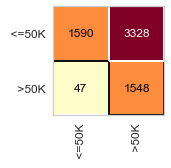

In [106]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento.toarray(), y_census_treinamento)
cm.score(x_census_teste.toarray(),y_census_teste)

In [109]:
# print(classification_report(y_census_teste,previsoes))

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [113]:
x_census_treinamento.shape, y_census_treinamento.shape

((26048, 108), (26048,))

In [114]:
x_census_teste.shape, y_census_teste.shape

((6513, 108), (6513,))

In [116]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(x_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [117]:
previsoes = knn_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [118]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [120]:
# accuracy_score(y_census_teste, previsoes)